# **PREDIKSI CUACA**

Dalam project ini kita akan melakukan prediksi cuaca dengan dataset **seattle-weather**.

Link **dataset**:
https://drive.google.com/file/d/1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm/view?usp=sharing

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **membaca dataset** _seattle-weather_
    - **menampilkan 15** baris data teratas



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Beking/UTS/seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
df.head(15)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


2. Munculkan **informasi** dataset dan lakukan **cleaning data** yang dibutuhkan:
    - mengecek dan menghapus **nilai kosong**
    - menghapus (**_drop_**) kolom _"date"_
    - mengecek dan menghapus data yang memiliki **nilai duplikat**

In [4]:
print("Informasi tentang dataset seattle-weather:")
print(df.info())

Informasi tentang dataset seattle-weather:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [5]:
print(f"Weather class list: {df['weather'].unique()}")

Weather class list: ['drizzle' 'rain' 'sun' 'snow' 'fog']


In [6]:
# Jumlah baris data
jumlah_baris_ori = df.shape[0]

# crate dataframe for null value
df_null = pd.DataFrame(df.isnull().sum(), columns=['null_value'])
df_null['null_value_percentage'] = df_null['null_value'] / len(df) * 100
df_null

,null_value,null_value_percentage
date,0,0.0
precipitation,0,0.0
temp_max,0,0.0
temp_min,0,0.0
wind,0,0.0
weather,0,0.0


In [7]:
print("Distribusi kelas target iris:")
print(df['weather'].value_counts())

Distribusi kelas target iris:
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64


In [8]:
df.drop(['date'], axis=1, inplace=True)
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [9]:
print('Total duplicated row = ', df.duplicated().sum())
# print duplicated data list index 1
df[df.duplicated(keep=False)]

Total duplicated row =  8


,precipitation,temp_max,temp_min,wind,weather
134,0.0,26.7,12.8,3.8,sun
188,0.0,26.7,12.8,3.8,sun
241,0.0,22.8,13.3,2.4,sun
331,0.0,10.0,1.7,1.5,sun
446,0.0,9.4,0.6,2.2,sun
492,0.0,20.6,11.1,3.3,sun
626,0.0,21.1,13.3,2.5,sun
629,0.0,21.1,13.3,2.5,sun
748,0.0,9.4,0.6,2.2,sun
751,0.0,10.0,1.7,1.5,sun


In [10]:
df = df.drop_duplicates(keep='first')
df.shape

(1453, 5)

## **Visualisasi**

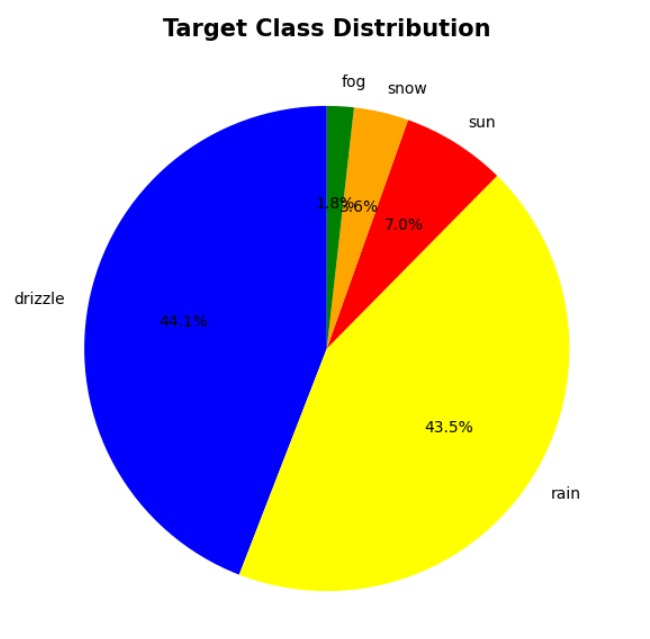

3. Diatas adalah contoh visualisasi menggunakan _diagram pie_,

    buatlah **visualisasi distribusi _target-class_** seperti diatas!

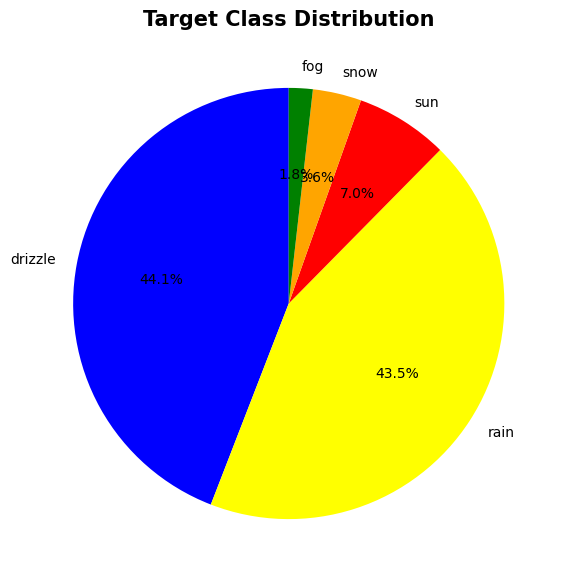

In [11]:
plt.figure(figsize=(7, 7))
plt.pie(df['weather'].value_counts(), labels=df['weather'].unique(), autopct='%1.1f%%', colors=['blue', 'yellow', 'red', 'orange', 'green'], startangle=90)
plt.title("Target Class Distribution", fontsize=15, fontweight="bold")
plt.show()

4. Anda akan melakukan **visualisasi relasi antar fitur** menggunakan _diagram scatter_.

    Perbaiki kata **'fix_me'** pada _code-cell_ dibawah!

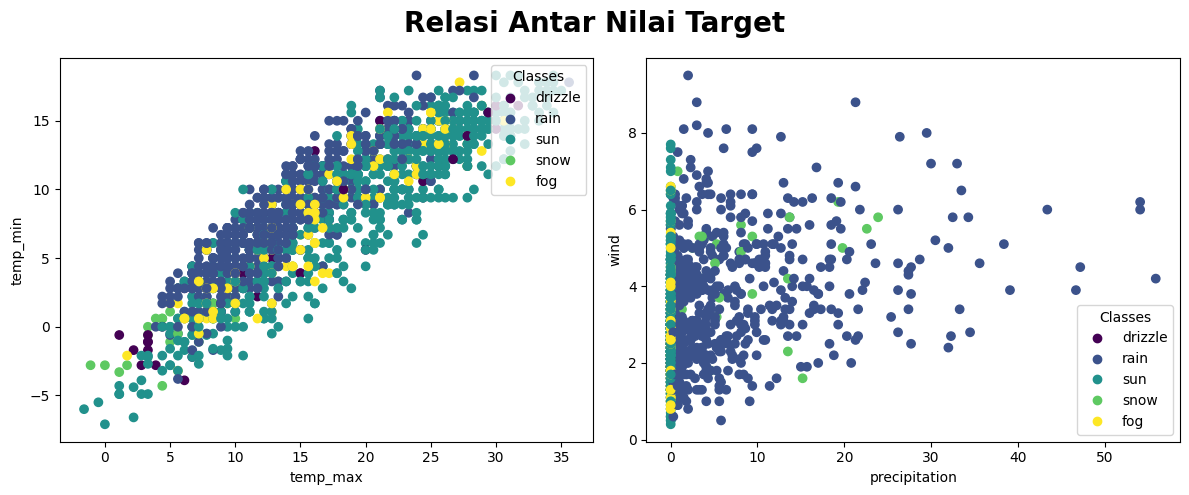

In [12]:
target_names= df['weather'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

target = df['weather'].replace({
  'drizzle': 0,
  'rain': 1,
  'sun': 2,
  'snow': 3,
  'fog': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['temp_max'], df['temp_min'], c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names, loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'], c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20, fontweight="bold")
plt.tight_layout()

<Axes: xlabel='temp_min', ylabel='Count'>

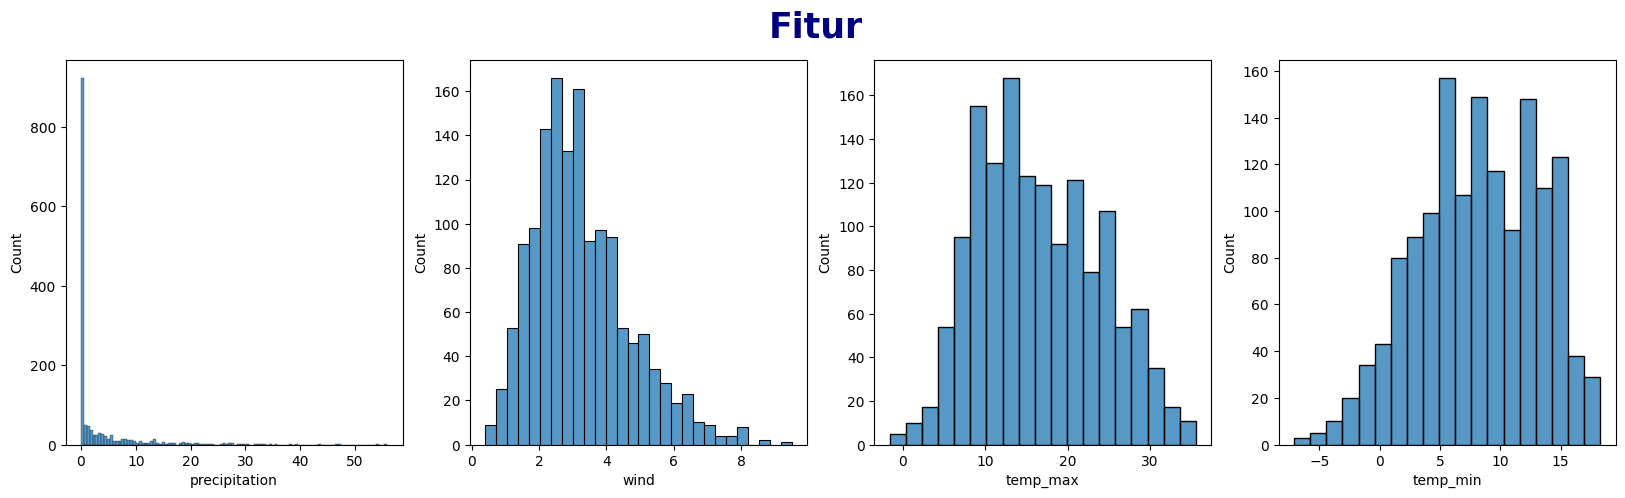

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.suptitle('Fitur', fontsize=25, fontweight='bold', color='navy')

# axis 1
sns.histplot(data=df, x='precipitation', ax=axes[0])

# axis 2
sns.histplot(data=df, x='wind', ax=axes[1])

# axis 3
sns.histplot(data=df, x='temp_max', ax=axes[2])

# axis 4
sns.histplot(data=df, x='temp_min', ax=axes[3])

## **Modelling**

5. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_

In [14]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

6. **Perbaiki kata 'fix_me'** pada _code-cell_ dibawah untuk **menampilkan visualisasi rasio _target-class_** pada _train-set_ dan _test-set_!

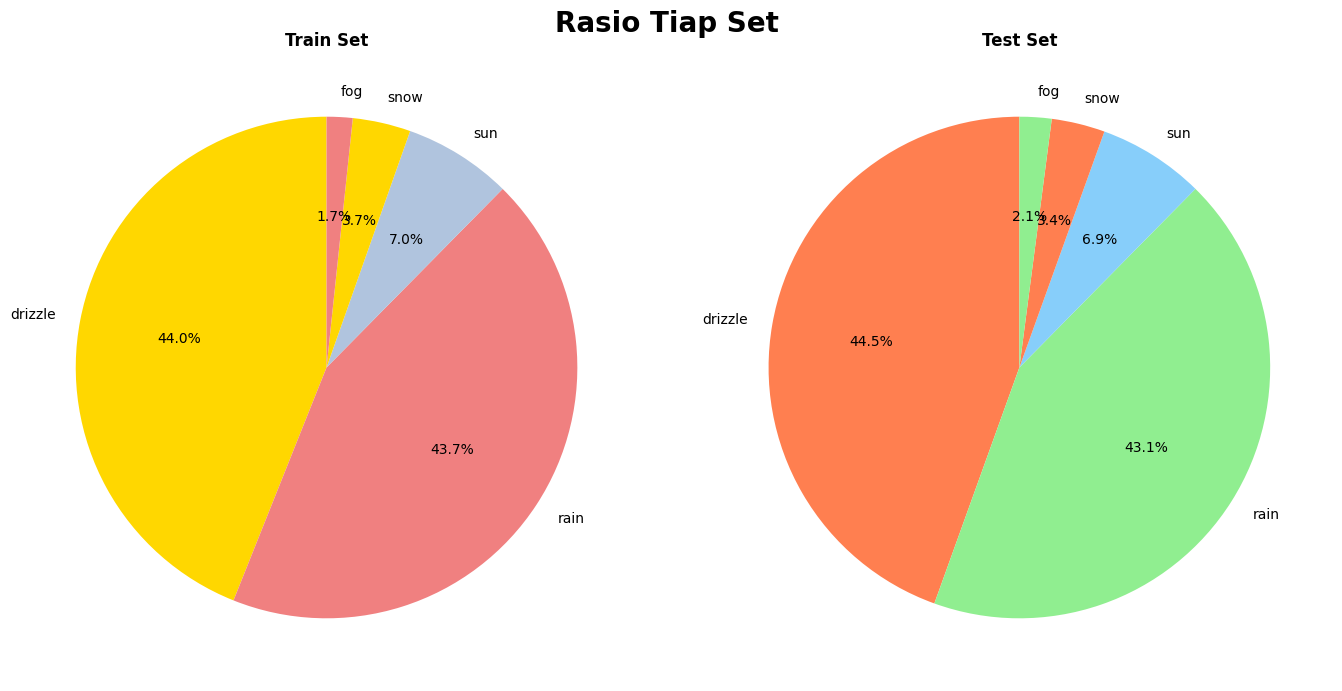

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

7.  Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!

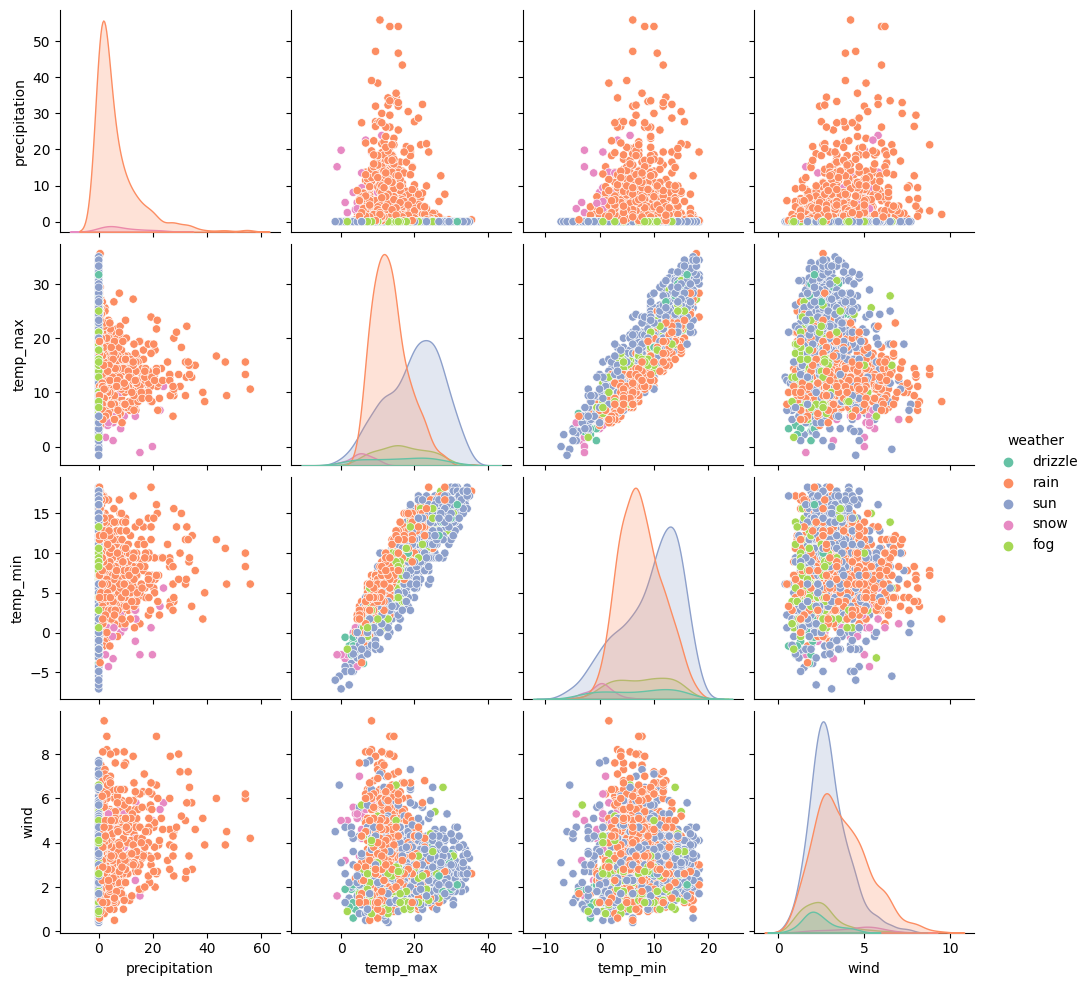

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kneighbors = KNeighborsClassifier()
kneighbors.fit(X_train, y_train)

sns.pairplot(df, hue='weather', palette='Set2', diag_kind='kde')
plt.show()

## **Evaluasi**

8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.

In [17]:
from sklearn.metrics import accuracy_score
y_pred = kneighbors.predict(X_test)
y_pred

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7660550458715596


## **Esai**

9. Berikan kesimpulan dari project yang telah anda buat.

Klasifikasi menggunakan dataset seattle-weather dengan algoritma KNN menghasilkan tingkat keakurasian yang cukup, dikarenakan beberapa faktor dari dataset seattle-weather walau memiliki nilai target yang seimbang dengan antar fitur yang baik sehingga dapat menghasilkan model yang memiliki akurasi 76%.

10. Upload dan lampirkan link
    - **Video** penjelasan berdurasi 10-15 menit mengenai project anda.
    - **Repository Github** berisi file notebook (_.ipynb_) anda.

In [18]:
link_video = ""
link_github = ""